In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('data/true_car_listings.csv')

In [4]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [5]:
df.shape

(852122, 8)

In [6]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [9]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# borro valores categoricos que no me van a funcionar de mucho

df.drop('City', axis=1, inplace=True) 
df.drop('State', axis=1, inplace=True) 
df.drop('Vin', axis=1, inplace=True)

In [11]:
numerical_features = ["Price", "Year", "Mileage"]

In [14]:
df["Make"].unique()

array(['Acura', 'Alfa', 'AM', 'Aston', 'Audi', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
       'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Geo', 'GMC', 'Honda',
       'HUMMER', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
       'smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder  

conversion = LabelEncoder() 

df["Make"] = conversion.fit_transform(df["Make"])
df["Model"] = conversion.fit_transform(df["Model"])

df["Make"].head()
df["Model"].head()

0    1194
1    1193
2    1194
3    1193
4    1196
Name: Model, dtype: int64

In [18]:
df["Make"].head()

0    1
1    1
2    1
3    1
4    1
Name: Make, dtype: int64

In [19]:
# las distancias son muy largas entonces las dejaremos entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

normalizacion = MinMaxScaler()
df[["Mileage"]] = normalizacion.fit_transform(df[["Mileage"]])


df.head()


,Price,Year,Mileage,Make,Model
0,8995,2014,0.012506,1,1194
1,10888,2013,0.006863,1,1193
2,8995,2013,0.017102,1,1194
3,10999,2014,0.013976,1,1193
4,14799,2016,0.007751,1,1196


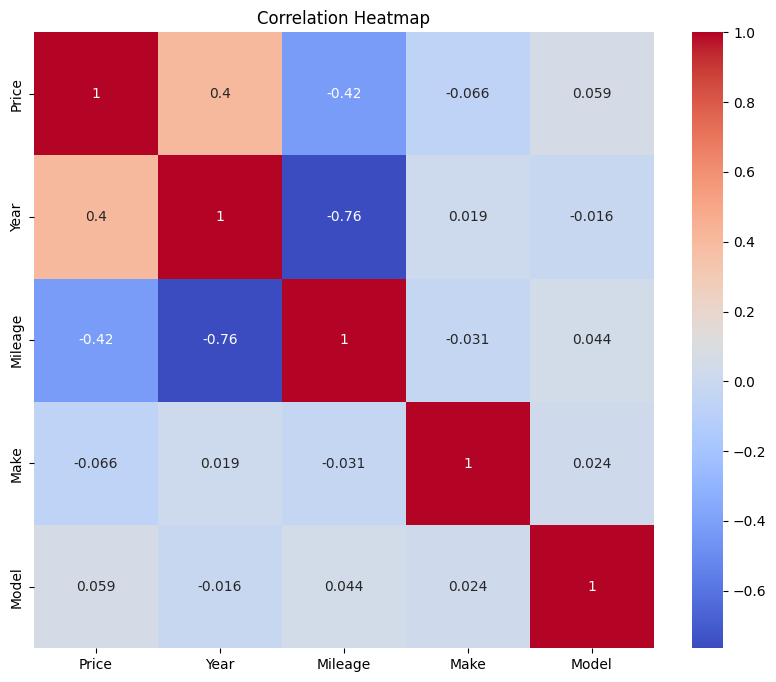

In [21]:
numerical_features = ["Price","Year","Mileage","Make","Model"]

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('Price', axis=1)
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)


y_pred = baseline_model.predict(X_test)


MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(MSE)
print(R2)


145983497.76789594
0.20599193912569624
